<img src="./images/header.png">

***

# Classificação de dados gerados aleatoriamente utilizando o método GMMBayes


In [20]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from astroML.classification import GMMBayes
from sklearn.model_selection import train_test_split
from astroML.datasets import fetch_LINEAR_geneva
from random import *

Dados orignais

In [23]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

data = fetch_LINEAR_geneva()

Dados orignais baixados a partir do repositório

In [24]:
df=pd.read_csv('data/LINEARattributesFinalApr2013.csv', delimiter = ",", index_col =False)

In [25]:
df.head()

,ra,dec,ug,gi,iK,JK,logP,Ampl,skew,kurt,magMed,nObs,LCtype,LINEARobjectID
0,119.526443,46.962120,1166,369,1018.0,269.0,-0.254138,619,-313.0,-567.0,16.37,301,1.0,29848.0
1,119.324013,47.095505,1356,521,1167.0,311.0,-0.244691,709,-493.0,-997.0,15.02,289,1.0,32086.0
2,118.503448,49.686569,1166,138,1154.0,384.0,-0.609386,601,-52.0,-447.0,16.14,245,1.0,43542.0
3,119.712975,52.149574,1175,386,1100.0,205.0,-0.191591,487,-291.0,-879.0,16.46,284,1.0,50402.0
4,118.491257,53.168125,805,554,1618.0,198.0,-0.178900,695,-26.0,-1059.0,14.08,274,1.0,61011.0


In [26]:
data.dtype

dtype([('RA', '<f8'), ('Dec', '<f8'), ('ug', '<f8'), ('gi', '<f8'), ('iK', '<f8'), ('JK', '<f8'), ('logP', '<f8'), ('amp', '<f8'), ('skew', '<f8'), ('kurt', '<f8'), ('magMed', '<f8'), ('nObs', '<f8'), ('LCtype', '<i4'), ('LINEARobjectID', 'S20')])

In [27]:
df.describe()

,ra,dec,ug,gi,iK,JK,logP,Ampl,skew,kurt,magMed,nObs,LCtype,LINEARobjectID
count,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6.146000e+03,6.010000e+03,4.836000e+03
mean,197.334025,274.487750,1138.235763,578.423202,1066.013709,310.577942,113.285404,500.853075,727.170285,1277.785770,72.766503,2.603940e+05,2.374449e+06,1.218847e+07
std,40.779294,511.188666,522.931842,574.658090,588.801328,238.154731,297.545660,2860.457920,5060.737109,8486.278088,134.351715,2.064982e+06,5.557648e+06,6.930305e+06
min,117.058571,-593.000000,-1834.000000,-1987.000000,-430.000000,-477.000000,-1295.000000,-99990.000000,-1653.000000,-1631.000000,1.000000,1.000000e+00,1.000000e+00,2.522000e+03
25%,162.678863,20.453927,1079.000000,183.000000,688.250000,111.000000,-0.492966,372.000000,-527.750000,-790.750000,15.220000,1.500000e+02,1.000000e+00,6.095220e+06
50%,201.189735,36.319488,1179.000000,388.500000,1049.000000,308.000000,-0.276667,511.000000,23.500000,-197.500000,16.000000,2.080000e+02,5.000000e+00,1.252983e+07
75%,233.680527,60.811287,1273.000000,945.000000,1378.000000,480.000000,-0.140970,703.000000,735.000000,85.000000,16.720000,2.680000e+02,5.000000e+00,1.838690e+07
max,270.695831,2545.000000,2961.000000,4449.000000,5398.000000,1189.000000,9620.000000,128619.000000,172951.000000,195465.000000,626.000000,2.426574e+07,2.420585e+07,2.426289e+07


Amostras aleatórias dentro do range de variação dos dados originais

In [28]:
atribute_0 = np.random.uniform(low=117.058571, high=2545, size=(len(data))).astype([('RA', '<f8')])

atribute_1 = np.random.uniform(low=-593, high=2545, size=(len(data))).astype([('Dec', '<f8')])

atribute_2 = np.random.uniform(low=-1834.00, high=2545, size=(len(data))).astype([('ug', '<f8')])

atribute_3 = np.random.uniform(low=-1987.00, high=5398.000000, size=(len(data))).astype([('gi', '<f8')])

atribute_4 = np.random.uniform(low=-430.00, high=128619.00, size=(len(data))).astype([('iK', '<f8')])

atribute_5 = np.random.uniform(low=-477.00, high=128619.00, size=(len(data))).astype([('JK', '<f8')])

atribute_6 = np.random.uniform(low=-1295.00, high=128619.00, size=(len(data))).astype([('logP', '<f8')])

atribute_7 = np.random.uniform(low=-99990.002545, size=(len(data))).astype([('amp', '<f8')])

Atribuição dos dados gerados ao dataset

In [29]:
for i in range(len(data)):
    data[i][0]=atribute_0[i][0]
    
for i in range(len(data)):
    data[i][1]=atribute_1[i][0]
    
for i in range(len(data)):
    data[i][2]=atribute_2[i][0]

for i in range(len(data)):
    data[i][3]=atribute_3[i][0]    

for i in range(len(data)):
    data[i][4]=atribute_4[i][0]
    
for i in range(len(data)):
    data[i][5]=atribute_5[i][0]
        
    
for i in range(len(data)):
    data[i][6]=atribute_6[i][0]

for i in range(len(data)):
    data[i][7]=atribute_7[i][0]

In [30]:
attributes = [('gi', 'logP'),
              ('gi', 'logP', 'ug', 'iK', 'JK', 'amp', 'skew')]
labels = ['$u-g$', '$g-i$', '$i-K$', '$J-K$',
          r'$\log(P)$', 'amplitude', 'skew']
cls = 'LCtype'
Ntrain = 3000

In [31]:
#------------------------------------------------------------
# Create attribute arrays
X = []
y = []

for attr in attributes:
    X.append(np.vstack([data[a] for a in attr]).T)
    LCtype = data[cls].copy()

    # there is no #3.  For a better color scheme in plots,
    # we'll set 6->3
    LCtype[LCtype == 6] = 3
    y.append(LCtype)

In [32]:
#@pickle_results('LINEAR_GMMBayes.pkl')
def compute_SVM_results(i_train, i_test, n_components=5):
    classifiers = []
    predictions = []
    Xtests = []
    ytests = []
    Xtrains = []
    ytrains = []

    for i in range(len(attributes)):
        Xtrain = X[i][i_train]
        Xtest = X[i][i_test]
        ytrain = y[i][i_train]
        ytest = y[i][i_test]

        clf = GMMBayes(n_components, tol=1E-5, covariance_type='full',
                       random_state=0)
        clf.fit(Xtrain, ytrain)
        y_pred = clf.predict(Xtest)

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

In [33]:
i = np.arange(len(data))
i_train, i_test = train_test_split(i, random_state=0, train_size=2000)
clfs, ypred = compute_SVM_results(i_train, i_test)

C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceW

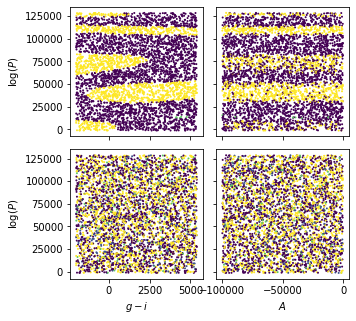

In [34]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

class_labels = []

for i in range(2):
    Xtest = X[i][i_test]
    ytest = y[i][i_test]
    amp = data['amp'][i_test]

    # Plot the resulting classifications
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.scatter(Xtest[:, 0], Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, linewidths=0)

    ax1.set_ylabel(r'$\log(P)$')

    ax2 = plt.subplot(222 + 2 * i)
    ax2.scatter(amp, Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, lw=0)

    #------------------------------
    # set axis limits
#     ax1.set_xlim(-0.6, 2.1)
#     ax2.set_xlim(0.1, 1.5)
#     ax1.set_ylim(-1.5, 0.5)
#     ax2.set_ylim(-1.5, 0.5)

    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    if i == 0:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel(r'$g-i$')
        ax2.set_xlabel(r'$A$')

Dados aleatórios sem respeitar o range dos dados originais

In [35]:
atribute_0 = np.random.rand(len(data)).astype([('RA', '<f8')])

atribute_1 = np.random.rand(len(data)).astype([('Dec', '<f8')])

atribute_2 = np.random.rand(len(data)).astype([('ug', '<f8')])

atribute_3 = np.random.rand(len(data)).astype([('gi', '<f8')])

atribute_4 = np.random.rand(len(data)).astype([('iK', '<f8')])

atribute_5 = np.random.rand(len(data)).astype([('JK', '<f8')])

atribute_6 = np.random.rand(len(data)).astype([('logP', '<f8')])

atribute_7 = np.random.rand(len(data)).astype([('amp', '<f8')])

In [36]:
for i in range(len(data)):
    data[i][0]=atribute_0[i][0]
    
for i in range(len(data)):
    data[i][1]=atribute_1[i][0]
    
for i in range(len(data)):
    data[i][2]=atribute_2[i][0]

for i in range(len(data)):
    data[i][3]=atribute_3[i][0]    

for i in range(len(data)):
    data[i][4]=atribute_4[i][0]
    
for i in range(len(data)):
    data[i][5]=atribute_5[i][0]
        
    
for i in range(len(data)):
    data[i][6]=atribute_6[i][0]

for i in range(len(data)):
    data[i][7]=atribute_7[i][0]

In [37]:
attributes = [('gi', 'logP'),
              ('gi', 'logP', 'ug', 'iK', 'JK', 'amp', 'skew')]
labels = ['$u-g$', '$g-i$', '$i-K$', '$J-K$',
          r'$\log(P)$', 'amplitude', 'skew']
cls = 'LCtype'
Ntrain = 3000

In [38]:
#------------------------------------------------------------
# Create attribute arrays
X = []
y = []

for attr in attributes:
    X.append(np.vstack([data[a] for a in attr]).T)
    LCtype = data[cls].copy()

    # there is no #3.  For a better color scheme in plots,
    # we'll set 6->3
    LCtype[LCtype == 6] = 3
    y.append(LCtype)

In [39]:
#@pickle_results('LINEAR_GMMBayes.pkl')
def compute_SVM_results(i_train, i_test, n_components=5):
    classifiers = []
    predictions = []
    Xtests = []
    ytests = []
    Xtrains = []
    ytrains = []

    for i in range(len(attributes)):
        Xtrain = X[i][i_train]
        Xtest = X[i][i_test]
        ytrain = y[i][i_train]
        ytest = y[i][i_test]

        clf = GMMBayes(n_components, tol=1E-5, covariance_type='full',
                       random_state=0)
        clf.fit(Xtrain, ytrain)
        y_pred = clf.predict(Xtest)

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

In [40]:
i = np.arange(len(data))
i_train, i_test = train_test_split(i, random_state=0, train_size=2000)
clfs, ypred = compute_SVM_results(i_train, i_test)

C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Willian\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


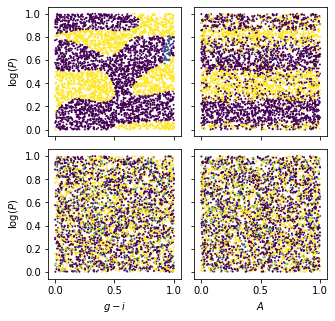

In [41]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

class_labels = []

for i in range(2):
    Xtest = X[i][i_test]
    ytest = y[i][i_test]
    amp = data['amp'][i_test]

    # Plot the resulting classifications
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.scatter(Xtest[:, 0], Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, linewidths=0)

    ax1.set_ylabel(r'$\log(P)$')

    ax2 = plt.subplot(222 + 2 * i)
    ax2.scatter(amp, Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, lw=0)

    #------------------------------
    # set axis limits
#     ax1.set_xlim(-0.6, 2.1)
#     ax2.set_xlim(0.1, 1.5)
#     ax1.set_ylim(-1.5, 0.5)
#     ax2.set_ylim(-1.5, 0.5)

    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    if i == 0:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel(r'$g-i$')
        ax2.set_xlabel(r'$A$')